In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
X = dataset.iloc[:, :-1].values

In [6]:
y = dataset.iloc[: , -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

Naive Bayes model Accuracy:  75.56%


<AxesSubplot:>

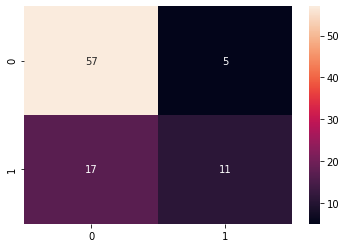

In [11]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
score1 = accuracy_score(y_test, y_pred)
print('Naive Bayes model Accuracy: ','{:.2f}%'.format(100*score1))
sns.heatmap(cm, annot=True)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

K-Nearest neighbors model Accuracy:  76.67%


<AxesSubplot:>

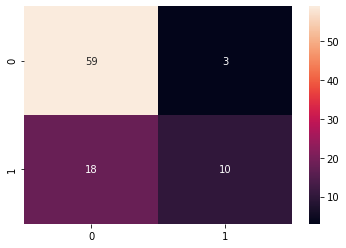

In [16]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
score2 = accuracy_score(y_test,y_pred)
print('K-Nearest neighbors model Accuracy: ','{:.2f}%'.format(100*score2))
sns.heatmap(cm, annot=True)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

Logistic Support Vector machine model Accuracy:  81.11%


<AxesSubplot:>

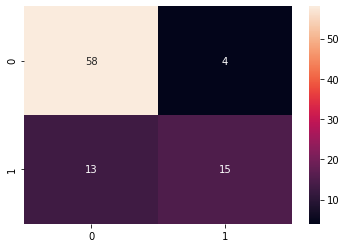

In [20]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
score4 = accuracy_score(y_test, y_pred)
print('Logistic Support Vector machine model Accuracy: ','{:.2f}%'.format(100*score4))
sns.heatmap(cm, annot=True)

In [21]:
from sklearn.svm import SVC

In [22]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

Kernel SVM model Accuracy:  83.33%


<AxesSubplot:>

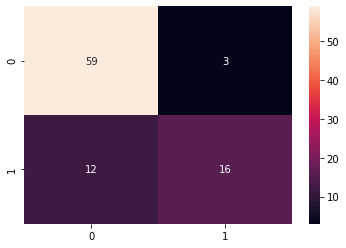

In [24]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
score5 = accuracy_score(y_test, y_pred)
print('Kernel SVM model Accuracy: ','{:.2f}%'.format(100*score5))
sns.heatmap(cm, annot=True)

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Decision tree model Accuracy:  84.44%


<AxesSubplot:>

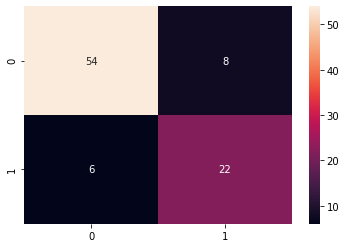

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
score6 = accuracy_score(y_test, y_pred)
print('Decision tree model Accuracy: ','{:.2f}%'.format(100*score6))
sns.heatmap(cm, annot=True)

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Random forest classification model Accuracy:  84.44%


<AxesSubplot:>

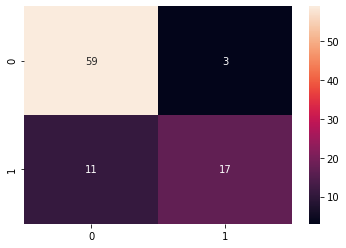

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
score7 = accuracy_score(y_test, y_pred)
print('Random forest classification model Accuracy: ','{:.2f}%'.format(100*score7))
sns.heatmap(cm, annot=True)

XGBoost model Accuracy:  84.44%


<AxesSubplot:>

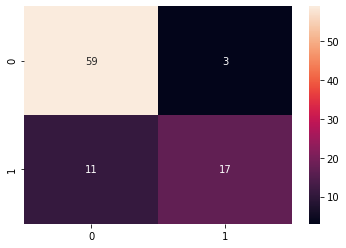

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
score8 = accuracy_score(y_test, y_pred)
print('XGBoost model Accuracy: ','{:.2f}%'.format(100*score8))
sns.heatmap(cm, annot=True)

In [30]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.90 %
Standard Deviation: 10.38 %


In [31]:
print('Naive Bayes model Accuracy: ','{:.2f}%'.format(100*score1),'\n')
print('K Nearest neighbors model Accuracy: ','{:.2f}%'.format(100*score2),'\n')
print('Logistic Regression model Accuracy: ','{:.2f}%'.format(100*score3),'\n')
print('Support Vector machine model Accuracy: ','{:.2f}%'.format(100*score4),'\n')
print('Kernel SVM model Accuracy: ','{:.2f}%'.format(100*score5),'\n')
print('Decision tree model Accuracy: ','{:.2f}%'.format(100*score6),'\n')
print('Random forest classification model Accuracy: ','{:.2f}%'.format(100*score7),'\n')

Naive Bayes model Accuracy:  75.56% 

K Nearest neighbors model Accuracy:  76.67% 



NameError: name 'score3' is not defined